<a href="https://colab.research.google.com/github/mariarosariolacuna/DownTheRabbitHole/blob/main/Job_Searching_personal%2C_corporate%2C_and_job_role_values_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Day 2 - Embeddings and similarity scores

Kaggle 5-day Generative AI course!

Use the Gemini API's embedding endpoint to explore similarity scores.

## Set up the SDK

In [1]:
%pip install -U -q "google-generativeai>=0.8.3"
import google.generativeai as genai

## Set up your API key

In [2]:
from google.colab import userdata


GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)

## Explore available models
You will be using the embedContent API method to calculate batch embeddings in this guide.

In [3]:
for model in genai.list_models():
  if 'embedContent' in model.supported_generation_methods:
    print(model.name)

models/embedding-001
models/text-embedding-004


In [5]:
# Define your personal values
personal_values = ['Growth', 'Learning', 'Kindness', 'Compassion', 'Sustainability','Environmental Consciousness','Resilience','Perseverance','Gratitude','Mindfulness','Integrity','Honesty','Family','Community','Financial independence','Financial security']

# corporate values
corporate_values = ['Customer-centric', 'People-oriented', 'Integrity', 'Ownership', 'Simplicity','Agility','Treating people right']

# job_role_values
job_role_values = ['Continuous Learning', 'Problem-Solving', 'Attention to Detail', 'Adaptability', 'Innovation','Collaboration','Communication','Passion','Positive Attitude','Integrity']



In [6]:
# Combine data for embedding
all_values = personal_values + corporate_values + job_role_values

In [7]:
# Generate embeddings
response = genai.embed_content(model='models/text-embedding-004',
                               content=all_values,
                               task_type='semantic_similarity')

embeddings = response['embedding']

## Calculate similarity scores

In [8]:
# Calculate similarity scores
from sklearn.metrics.pairwise import cosine_similarity

personal_values_embeddings = embeddings[:len(personal_values)]
corporate_values_embeddings = embeddings[len(personal_values):len(personal_values) + len(corporate_values)]  # Get embeddings for corporate values
job_role_values_embeddings = embeddings[len(personal_values) + len(corporate_values):]  # Get embeddings for job role values

# Calculate similarity between personal and corporate values
similarity_scores_personal_corporate = cosine_similarity(personal_values_embeddings, corporate_values_embeddings)

# Calculate similarity between personal and job role values
similarity_scores_personal_job_role = cosine_similarity(personal_values_embeddings, job_role_values_embeddings)

## Analyze and interpret scores

In [9]:
# Analyze and interpret scores
print("Similarity Scores between Personal and Corporate Values:")
for i, value in enumerate(personal_values):
  print(f"{value}: {similarity_scores_personal_corporate[i][similarity_scores_personal_corporate[i].argmax()]}")  # Print the highest similarity score for each personal value

Similarity Scores between Personal and Corporate Values:
Growth: 0.6213474466665009
Learning: 0.6090409950153322
Kindness: 0.7972595178973567
Compassion: 0.743942201316667
Sustainability: 0.65663433309861
Environmental Consciousness: 0.6353180573579527
Resilience: 0.6602878884193545
Perseverance: 0.6389275633754968
Gratitude: 0.6431664077859338
Mindfulness: 0.6557173559180398
Integrity: 0.9999999999999998
Honesty: 0.8242997891013479
Family: 0.6509442512907988
Community: 0.6953733123754715
Financial independence: 0.6025646467635052
Financial security: 0.621367187346286


In [10]:
# Analyze and interpret scores
print("Similarity Scores between Personal and Job Role Values:")
for i, value in enumerate(personal_values):
  print(f"{value}: {similarity_scores_personal_job_role[i][similarity_scores_personal_job_role[i].argmax()]}")  # Print the highest similarity score for each personal value

Similarity Scores between Personal and Job Role Values:
Growth: 0.6610815378055548
Learning: 0.8269834259131991
Kindness: 0.7134634902046244
Compassion: 0.742299609873893
Sustainability: 0.6850946614446698
Environmental Consciousness: 0.6245624441084746
Resilience: 0.7850866371281817
Perseverance: 0.7172822632152155
Gratitude: 0.7270695235712905
Mindfulness: 0.6686685212952581
Integrity: 0.9999999999999998
Honesty: 0.8242997891013479
Family: 0.6726384782588568
Community: 0.6843870663863775
Financial independence: 0.548177048360256
Financial security: 0.621367187346286


## Visualization

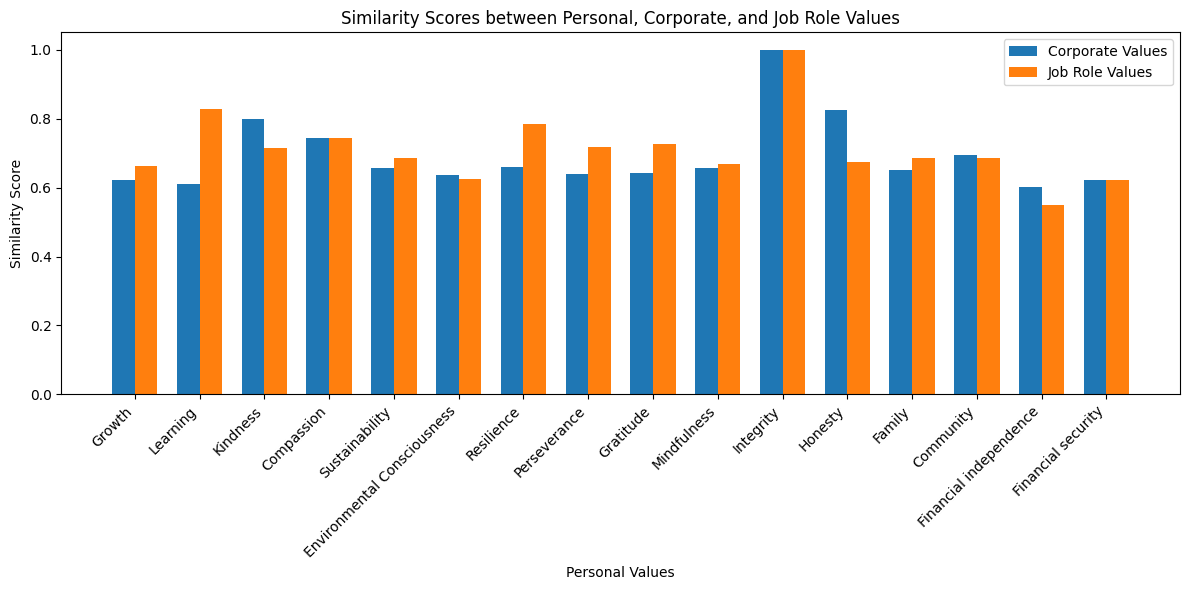

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Your similarity scores
personal_values = ['Growth', 'Learning', 'Kindness', 'Compassion', 'Sustainability', 'Environmental Consciousness', 'Resilience', 'Perseverance', 'Gratitude', 'Mindfulness', 'Integrity', 'Honesty', 'Family', 'Community', 'Financial independence', 'Financial security']
corporate_scores = [0.6213474466665009, 0.6090409950153322, 0.7972595178973567, 0.743942201316667, 0.65663433309861, 0.6353180573579527, 0.6602878884193545, 0.6389275633754968, 0.6431664077859338, 0.6557173559180398, 0.9999999999999998, 0.8242997891013479, 0.6509442512907988, 0.6953733123754715, 0.6025646467635052, 0.621367187346286]
job_role_scores = [0.6610815378055548, 0.8269834259131991, 0.7134634902046244, 0.742299609873893, 0.6850946614446698, 0.6245624441084746, 0.7850866371281817, 0.7172822632152155, 0.7270695235712905, 0.6686685212952581, 0.9999999999999998, 0.6726384782588568, 0.6843870663863775, 0.6843870663863775, 0.548177048360256, 0.621367187346286]

# Create bar positions
bar_width = 0.35
index = np.arange(len(personal_values))

# Create the bar chart
fig, ax = plt.subplots(figsize=(12, 6))
corporate_bars = ax.bar(index, corporate_scores, bar_width, label='Corporate Values')
job_role_bars = ax.bar(index + bar_width, job_role_scores, bar_width, label='Job Role Values')

# Add labels, title, and legend
ax.set_xlabel('Personal Values')
ax.set_ylabel('Similarity Score')
ax.set_title('Similarity Scores between Personal, Corporate, and Job Role Values')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(personal_values, rotation=45, ha='right')  # Rotate x-axis labels for better readability
ax.legend()

# Display the chart
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

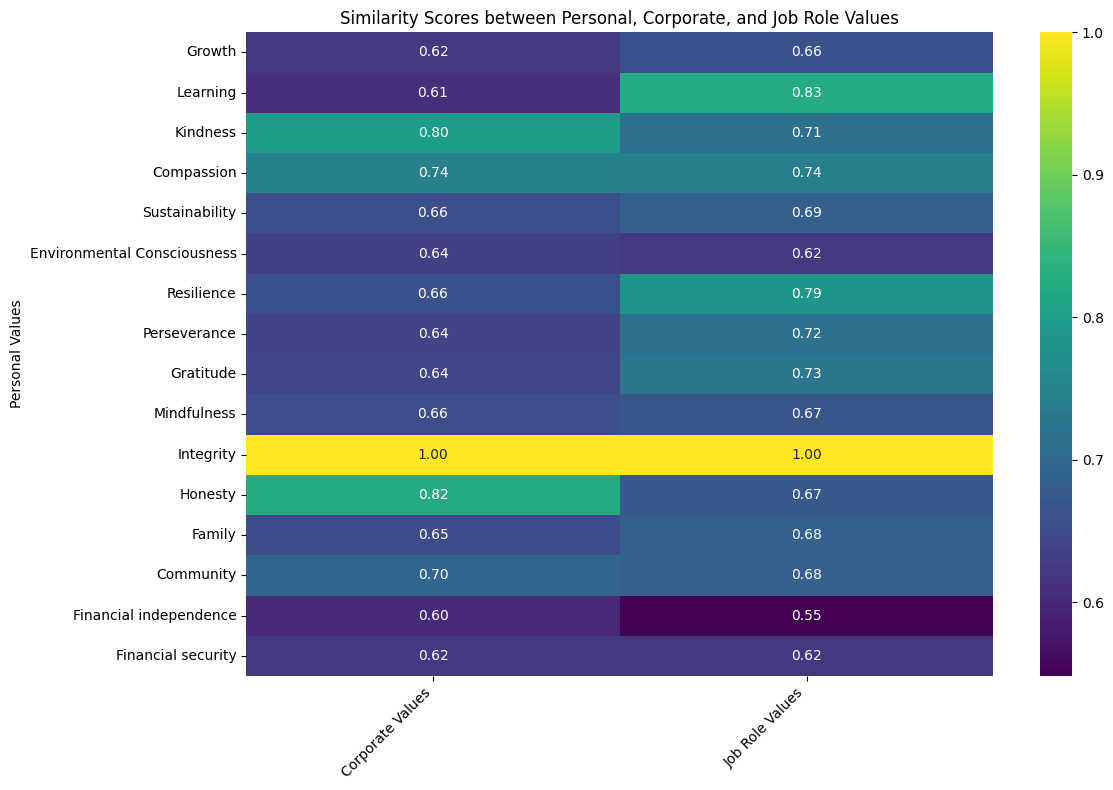

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Your similarity scores
personal_values = ['Growth', 'Learning', 'Kindness', 'Compassion', 'Sustainability', 'Environmental Consciousness', 'Resilience', 'Perseverance', 'Gratitude', 'Mindfulness', 'Integrity', 'Honesty', 'Family', 'Community', 'Financial independence', 'Financial security']
corporate_scores = [0.6213474466665009, 0.6090409950153322, 0.7972595178973567, 0.743942201316667, 0.65663433309861, 0.6353180573579527, 0.6602878884193545, 0.6389275633754968, 0.6431664077859338, 0.6557173559180398, 0.9999999999999998, 0.8242997891013479, 0.6509442512907988, 0.6953733123754715, 0.6025646467635052, 0.621367187346286]
job_role_scores = [0.6610815378055548, 0.8269834259131991, 0.7134634902046244, 0.742299609873893, 0.6850946614446698, 0.6245624441084746, 0.7850866371281817, 0.7172822632152155, 0.7270695235712905, 0.6686685212952581, 0.9999999999999998, 0.6726384782588568, 0.6843870663863775, 0.6843870663863775, 0.548177048360256, 0.621367187346286]

# Create a DataFrame for the heatmap
data = {'Personal Values': personal_values,
        'Corporate Values': corporate_scores,
        'Job Role Values': job_role_scores}
df = pd.DataFrame(data)
df = df.set_index('Personal Values')  # Set Personal Values as index

# Create the heatmap
plt.figure(figsize=(12, 8))  # Adjust figure size as needed
sns.heatmap(df, annot=True, cmap='viridis', fmt=".2f")  # annot=True displays values
plt.title('Similarity Scores between Personal, Corporate, and Job Role Values')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

## Insights
Chain of Thought (CoT)

In [15]:
# ask to the model insights about the results, it should "think step by step

prompt = """Let's break down the result of the similarity scores between my personal values, the corporate, and the job role values
The results was from the use the Gemini API's embedding endpoint to explore similarity scores method.

Similarity Scores between Personal and Corporate Values:
Growth: 0.6213474466665009
Learning: 0.6090409950153322
Kindness: 0.7972595178973567
Compassion: 0.743942201316667
Sustainability: 0.65663433309861
Environmental Consciousness: 0.6353180573579527
Resilience: 0.6602878884193545
Perseverance: 0.6389275633754968
Gratitude: 0.6431664077859338
Mindfulness: 0.6557173559180398
Integrity: 0.9999999999999998
Honesty: 0.8242997891013479
Family: 0.6509442512907988
Community: 0.6953733123754715
Financial independence: 0.6025646467635052
Financial security: 0.621367187346286

Similarity Scores between Personal and Job Role Values:
Growth: 0.6610815378055548
Learning: 0.8269834259131991
Kindness: 0.7134634902046244
Compassion: 0.742299609873893
Sustainability: 0.6850946614446698
Environmental Consciousness: 0.6245624441084746
Resilience: 0.7850866371281817
Perseverance: 0.7172822632152155
Gratitude: 0.7270695235712905
Mindfulness: 0.6686685212952581
Integrity: 0.9999999999999998
Honesty: 0.8242997891013479
Family: 0.6726384782588568
Community: 0.6843870663863775
Financial independence: 0.548177048360256
Financial security: 0.621367187346286


First, discuss the overall insights and observations?
Then provide  recommendations.
Provide disclaimers or things to note at the end.
Let's think step by step."""

model = genai.GenerativeModel('gemini-1.5-flash-latest')

# Define a simple retry policy
from google.api_core.retry import Retry

retry_policy = Retry(initial=0.25,  # Initial retry delay in seconds
                     maximum=3.0,   # Maximum retry delay in seconds
                     multiplier=1.3) # Retry delay multiplier

response = model.generate_content(prompt, request_options={'retry': retry_policy})

print(response.text)

## Overall Insights and Observations:

The similarity scores reveal a strong alignment between your personal values and both the corporate and job role values, particularly in areas of integrity and honesty, where scores are near-perfect (0.99999...).  This suggests a good cultural fit.  However, a nuanced look shows some important differences:

**Strengths:**

* **High Alignment on Core Values:**  The consistently high scores across various values (Kindness, Compassion, Integrity, Honesty) indicate a strong potential for job satisfaction and a sense of belonging within the company culture.  This is encouraging.
* **Job Role's Stronger Alignment in Some Areas:**  The job role values show a slightly better alignment than the corporate values in certain areas like Learning, Resilience, Perseverance, and Gratitude. This suggests the specific job itself might be a better fit for your personal values than the broader company culture in these aspects.  This is positive as it suggests a fulfi

In [16]:
from IPython import get_ipython
from IPython.display import HTML, Markdown, display

Markdown(response.text)

## Overall Insights and Observations:

The similarity scores reveal a strong alignment between your personal values and both the corporate and job role values, particularly in areas of integrity and honesty, where scores are near-perfect (0.99999...).  This suggests a good cultural fit.  However, a nuanced look shows some important differences:

**Strengths:**

* **High Alignment on Core Values:**  The consistently high scores across various values (Kindness, Compassion, Integrity, Honesty) indicate a strong potential for job satisfaction and a sense of belonging within the company culture.  This is encouraging.
* **Job Role's Stronger Alignment in Some Areas:**  The job role values show a slightly better alignment than the corporate values in certain areas like Learning, Resilience, Perseverance, and Gratitude. This suggests the specific job itself might be a better fit for your personal values than the broader company culture in these aspects.  This is positive as it suggests a fulfilling day-to-day experience.
* **Areas of Moderate Alignment:** While many values show strong alignment (scores above 0.6), some (like Sustainability, Environmental Consciousness, and Family/Community)  show moderate alignment. This indicates areas for potential consideration and discussion during the interview process or onboarding.

**Areas for Consideration:**

* **Financial Values:** The scores for "Financial independence" and "Financial security" are relatively low, particularly for the job role. This discrepancy is a potential flag requiring further investigation.  Does the job offer sufficient compensation and growth opportunities to meet your financial goals?
* **Slight Discrepancy between Corporate and Job Role Values:** While overall alignment is strong, the subtle differences between corporate and job role scores suggest the company culture might not perfectly reflect the day-to-day experience of the job.


## Recommendations:

1. **Investigate Financial Aspects:** Prioritize clarifying the financial aspects of the job.  Research the salary, benefits, and long-term growth potential within the company. If the discrepancy between your values and the job's financial aspects remains, this could be a deal-breaker.

2. **Focus on the Job Role During Interviews:** During the interview process, emphasize your interest in the aspects of the job role that show high alignment with your values (Learning, Resilience, Perseverance, Gratitude).  Ask specific questions to gauge how these values are lived and supported within the team and the day-to-day workflow.

3. **Explore Company Culture More Deeply:**  While the corporate value scores are good, try to gather more qualitative data on the company culture through online research, employee reviews (Glassdoor, etc.), and conversations with current employees.

4. **Manage Expectations on Sustainability/Environmental Consciousness:** Given the moderate scores in these areas, manage your expectations.  Understand the company's current initiatives and consider whether they align with your level of commitment to these values. If this is a high priority for you, be prepared to potentially advocate for changes or seek out roles within the company that focus on sustainability.

5. **Discuss Family/Community Alignment:** Consider how the job's demands will interact with your family and community values. Will the work-life balance allow you to maintain your desired level of involvement in these areas?


## Disclaimers and Things to Note:

* **Methodological Limitations:**  The similarity scores are based on embeddings and are just one measure of alignment. Human judgment and qualitative information are crucial for a complete picture.
* **Value Interpretation:** The interpretation of values can be subjective. Ensure the values used in the analysis truly reflect your understanding and the company/role's.
* **Context Matters:** The scores provide a quantitative view, but the context (e.g., company size, industry) greatly influences the overall fit.
* **Further Exploration:**  Supplement these scores with further research and interviews to gain a well-rounded understanding before making a decision.


These scores provide a valuable starting point for your decision-making process, but they should not be interpreted in isolation. Use them as a guide alongside other information and your own judgment.
